# **Python for Data Science**

## Final Project

### Data Cleaning

*Part*: Noor

*Dataset*: MCD

---

# **README.md**

### MCD Data Cleaning Notebook

This notebook focuses on cleaning and preprocessing data for better analysis. Below are the steps we followed:

### Key Steps
1. **Importing Dataset**: 
   - Loaded the raw dataset into the notebook using pandas.

2. **Inspecting the DataFrame**:
   - Examined the structure of the data using methods like `.head()`, `.info()`, and `.describe()`.
   - Gained insights into the data types, column values, and overall quality of the dataset.

3. **Cleaning the Dataset**:
   - **a) Sorting the Dataset**:
     - Organized the data based on specific columns for easier analysis.
   - **b) Identifying and Removing Duplicate Rows**:
     - Checked for duplicate entries and removed them to ensure data accuracy.
   - **c) Visualizing the Dataset to Identify Outliers**:
     - Created visualizations to detect potential outliers in the dataset.
   - **d) Removing Outliers**:
     - Applied techniques to filter out extreme values that could skew the analysis.
   - **e) Imputing Missing Values**:
     - Handled missing data using appropriate imputation strategies.

4. **Exporting the Cleaned Dataset**:
   - Saved the cleaned dataset to a file for future use.

---

## Import Dataset

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Noor-Raza/Python-for-Data-Science-Final-Project/main/Raw%20Dataset/MCD.csv')

---

## Inspect Dataframe

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1966-07-05,0.0,0.273663,0.267490,0.269547,0.115991,388800.0
1,1966-07-06,0.0,0.283951,0.267490,0.283951,0.122190,692550.0
2,1966-07-07,0.0,0.291152,0.271605,0.273663,0.117762,1858950.0
3,1966-07-08,0.0,0.276749,0.267490,0.276749,0.119090,1239300.0
4,1966-07-11,0.0,0.283951,502.093928,507.408717,0.118648,656100.0


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,13944.000000,13943.000000,13942.000000,13948.000000,13943.000000,1.392400e+04
mean,62.427811,63.495148,62.010849,62.790057,51.169982,4.269226e+06
std,102.837055,104.139944,102.148455,103.191622,90.609843,3.082398e+06
min,0.000000,0.156379,0.152263,0.154321,0.066407,4.860000e+04
25%,1.626543,1.654321,1.608025,1.638889,0.738819,2.359100e+06
50%,19.125000,20.250000,18.975000,19.375000,10.634046,3.592425e+06
75%,79.004999,82.709999,78.689999,80.707499,57.103874,5.388700e+06
max,505.252854,512.653011,502.093928,507.408717,412.120636,8.698130e+07


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14657 entries, 0 to 14656
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14657 non-null  object 
 1   Open       13944 non-null  float64
 2   High       13943 non-null  float64
 3   Low        13942 non-null  float64
 4   Close      13948 non-null  float64
 5   Adj Close  13943 non-null  float64
 6   Volume     13924 non-null  float64
dtypes: float64(6), object(1)
memory usage: 801.7+ KB


In [5]:
df.shape

(14657, 7)

In [6]:
df.isna().sum()

Date           0
Open         713
High         714
Low          715
Close        709
Adj Close    714
Volume       733
dtype: int64

In [7]:
(df == 0).sum()

Date           0
Open         782
High           0
Low            0
Close          0
Adj Close      0
Volume         0
dtype: int64

---

## Clean Dataset

### Step 1: Sort data

As the data is not sorted by the dates, we implement this as basis for all following steps.

In [8]:
df['Date'] = pd.to_datetime(df['Date'])  # Convert column to datetime object

df = df.sort_values(by='Date', ascending=True)  # Sort values from oldest to newest

df = df.reset_index(drop=True)  # Reset the dataframes index

df  # Check results

,Date,Open,High,Low,Close,Adj Close,Volume
0,1966-07-05,0.000000,0.273663,0.267490,0.269547,0.115991,388800.0
1,1966-07-06,0.000000,0.283951,0.267490,0.283951,0.122190,692550.0
2,1966-07-07,0.000000,0.291152,0.271605,0.273663,0.117762,1858950.0
3,1966-07-08,0.000000,0.276749,0.267490,0.276749,0.119090,1239300.0
4,1966-07-11,0.000000,0.283951,502.093928,507.408717,0.118648,656100.0
...,...,...,...,...,...,...,...
14652,2024-09-13,294.489990,296.739990,292.619995,296.529999,296.529999,2205500.0
14653,2024-09-16,297.420013,300.109985,295.040009,NaN,296.690002,2916200.0
14654,2024-09-17,297.000000,297.390015,292.170013,293.750000,293.750000,2997400.0
14655,2024-09-18,293.880005,295.100006,290.369995,292.029999,292.029999,1788200.0


### Step 2: Remove duplicates

Next up, we identify and remove duplicate rows.

In [9]:
duplicate_dates = []  # Initialize list of duplicate dates
date_value_counts = df['Date'].value_counts()  # Count the number of times the dates appear

for date in date_value_counts.index:  # Iterate through all dates
    if date_value_counts[date] > 1:  # Check if the specific date appears more than once
        duplicate_dates.append(date)  # Add dates that appear more than once to the list of duplicate dates

print('The following dates appear more than once:')
for date in duplicate_dates:
    print(date)

The following dates appear more than once:
2015-03-17 00:00:00
1978-06-28 00:00:00
1977-12-27 00:00:00
1973-03-19 00:00:00
1971-06-23 00:00:00


It seems that there are 5 duplicate dates. We will go ahead and check if the values are the same for each of the duplicates.

In [10]:
no_duplicates = df.duplicated().sum()  # Count how many rows are duplicate

print(f'There are {no_duplicates} duplicate rows.')

There are 5 duplicate rows.


Upon further inspection, all 5 rows have entirely duplicate values. This means we can go ahead and remove all duplicates and reset the indexes.

In [11]:
df.drop_duplicates(inplace=True)  # Drop all remaining duplicate rows

df = df.reset_index(drop=True)  # Reset the dataframes index

Lastly, we check the results.

In [12]:
new_no_duplicates = df.duplicated().sum()  # Count how many rows are duplicate

print(f'There are {new_no_duplicates} duplicate rows.')

There are 0 duplicate rows.


### Step 3: Visualize data

In order to determine which data cleaning steps need to be taken next, we visualize the data.

In [13]:
visu_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']  # Define the relevant columns for data visualization

We have first determined the relevant columns to plot the graphs.

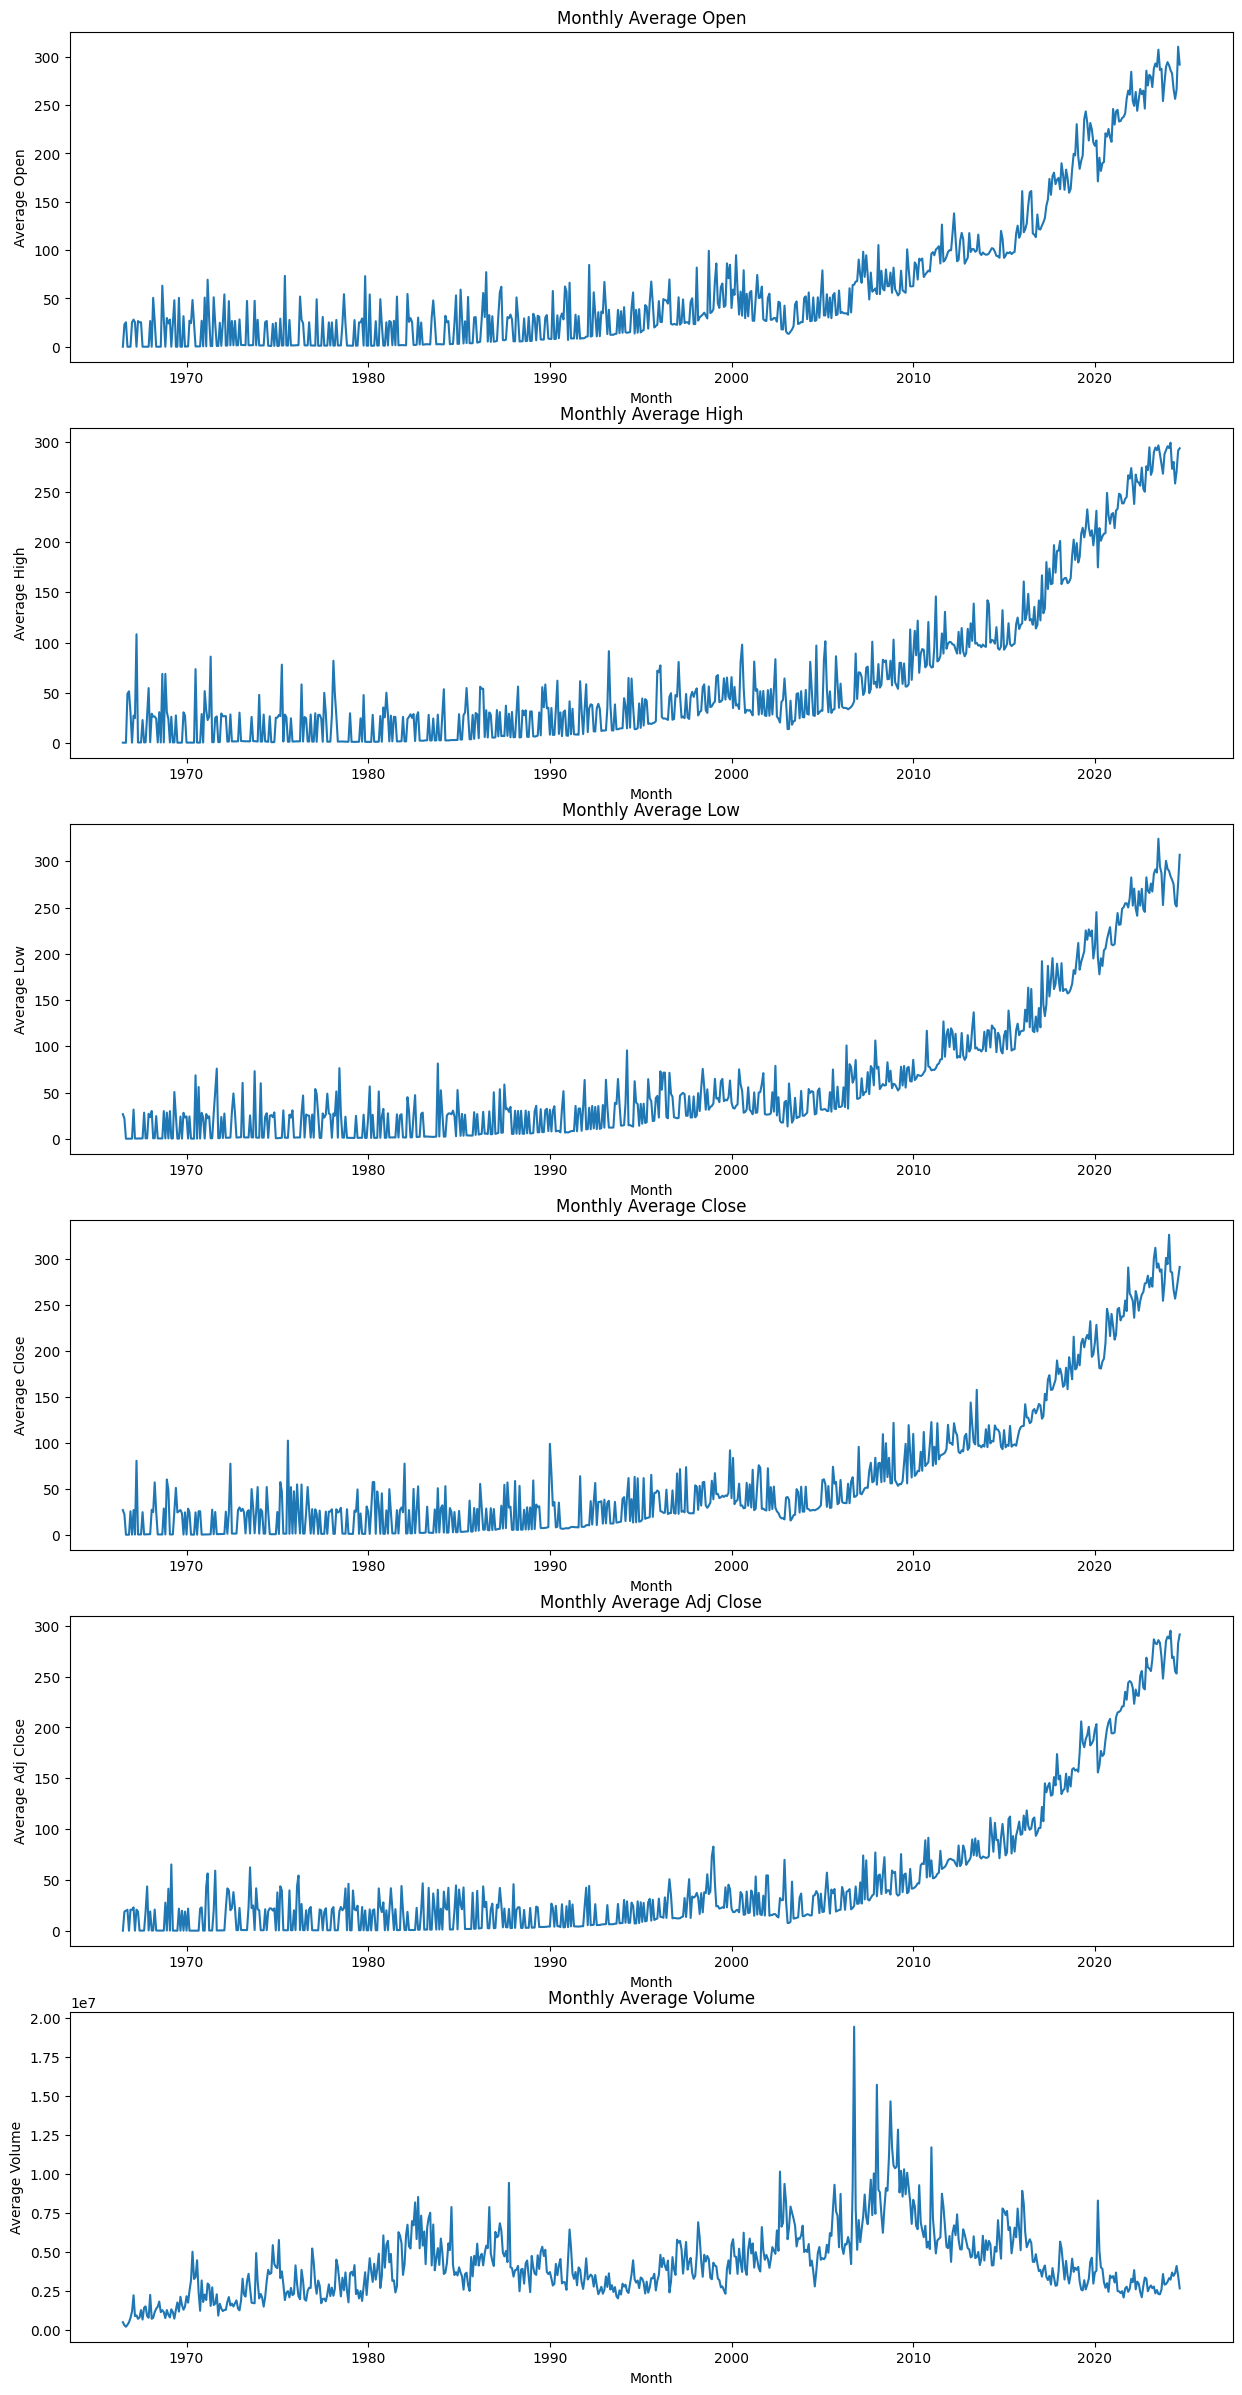

In [14]:
import matplotlib.pyplot as plt

df['YearMonth'] = df['Date'].dt.to_period('M')  # Create a new column for this graph displaying the month and year

rows = len(visu_columns)  # Determine the number of rows of subplots
fig, axes = plt.subplots(rows, 1, figsize=(15, 5 * rows))  # Adjust figure size based on rows
axes = axes.flatten()  # Flatten axes for iteration

for i, col in enumerate(visu_columns):  # Iterate through the relevant columns
    monthly_price = df.groupby('YearMonth')[col].mean()  # Group the price by months and calculate the mean
    monthly_price.index = monthly_price.index.to_timestamp()  # Convert the period to timestamp
    axes[i].plot(monthly_price)  # Plot the monthly prices
    axes[i].set_title(f'Monthly Average {col}')  # Set graph title
    axes[i].set_xlabel('Month')  # Set graph x axis label
    axes[i].set_ylabel(f'Average {col}')  # Set graph y axis label

plt.show()  # Display graph

After calculating and grouping the average monthly open and close prices, we can see the plotted stock development. It seems that there are some outliers in peaks and some zeros.

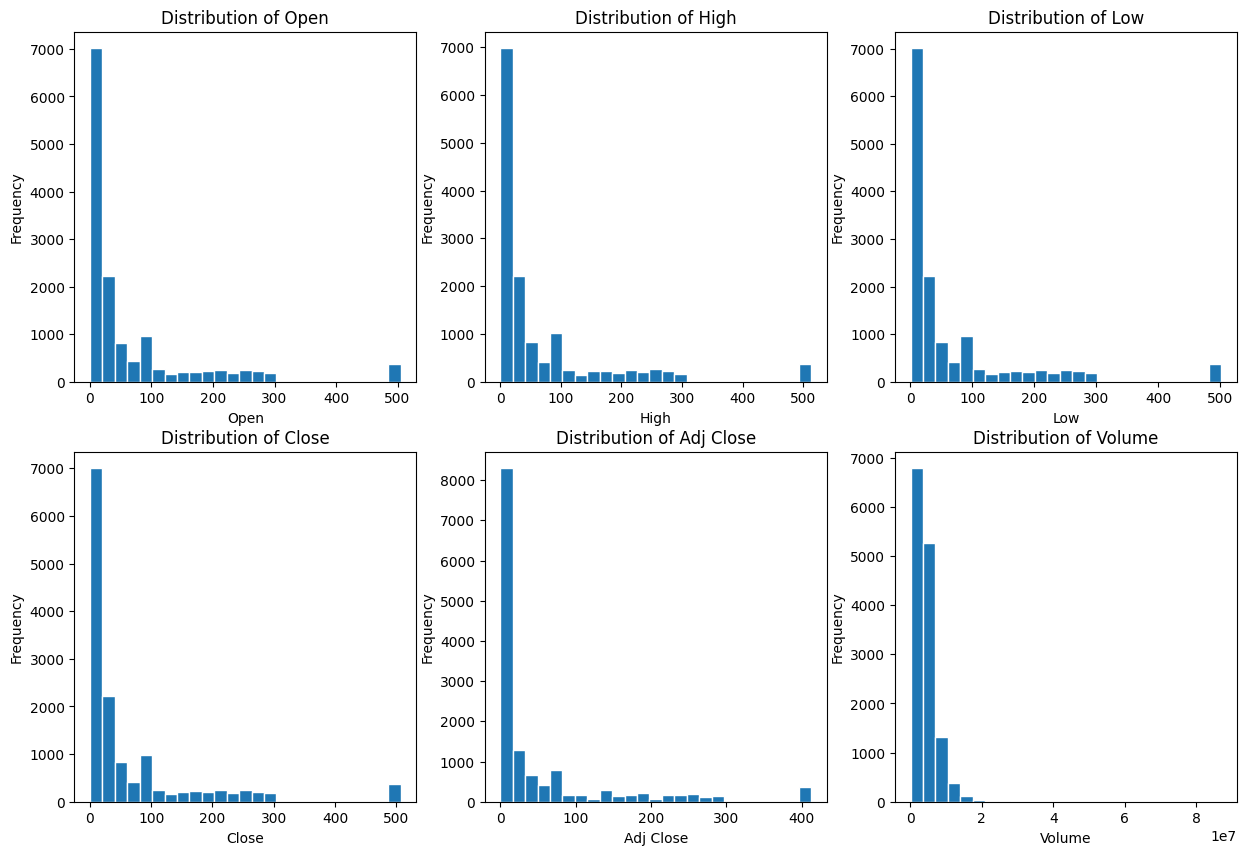

In [15]:
rows = len(visu_columns)//3  # Determine the number of rows of subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust the figure size based on rows
axes = axes.flatten()  # Flatten axes for iteration

for i, col in enumerate(visu_columns):  # Iterate through the relevant columns
    axes[i].hist(df[col], bins=25, edgecolor='white')  # Plot the distribution
    axes[i].set_title(f'Distribution of {col}')  # Set graph title
    axes[i].set_xlabel(col)  # Set graph x axis label
    axes[i].set_ylabel('Frequency')  # Set graph y axis label

plt.show()  # Display graph

These histograms underline the previous assumptions on outliers. To further strengthen this assessment we will also display some boxplots.

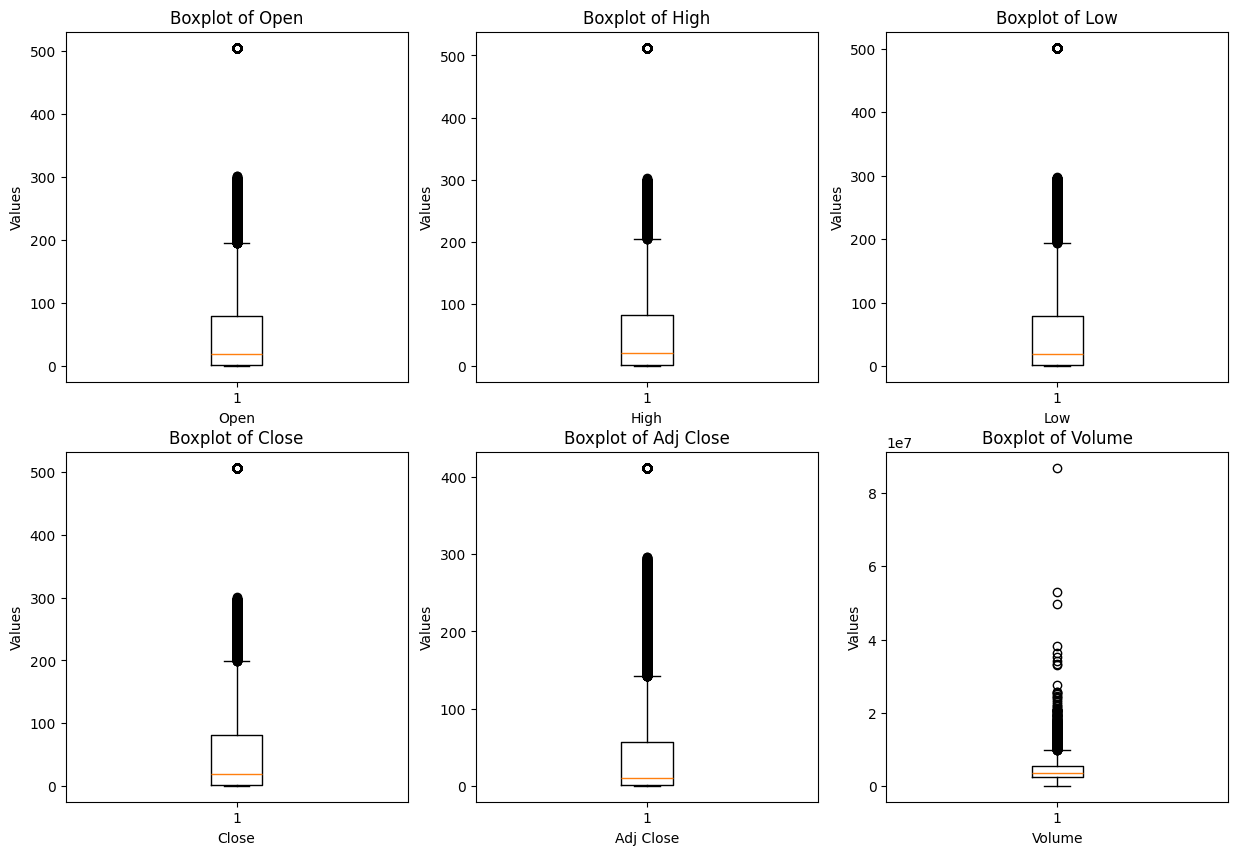

In [16]:
rows = len(visu_columns)//3  # Determine the number of rows of subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust the figure size based on rows
axes = axes.flatten()  # Flatten axes for iteration

for i, col in enumerate(visu_columns):  # Iterate through the relevant columns
    axes[i].boxplot(df[col].dropna(), vert=True)  # Plot the boxplots
    axes[i].set_title(f'Boxplot of {col}')  # Set graph title
    axes[i].set_xlabel(col)  # Set graph x axis label
    axes[i].set_ylabel('Values')  # Set graph y axis label

plt.show()  # Display graph

Based on the visualizations and data inspection, we will move on with removing the outliers. We will thereby focus on zero values and extraordinarily high values in the context of the data.

### Step 4: Remove outliers

As the next step we will remove all the previously determined outliers.

In [17]:
for col in visu_columns:  # Iterate through all relevant columns
    df[col] = df[col].astype('Float64')  # Set float type before replacement

df.dtypes  # Check results

Date         datetime64[ns]
Open                Float64
High                Float64
Low                 Float64
Close               Float64
Adj Close           Float64
Volume              Float64
YearMonth         period[M]
dtype: object

Based on the data visualization we decided to convert all zero values to N/A in order to impute them later on.

In [18]:
df = df.replace(0, pd.NA)  # Replace zeros with N/A

(df == 0).sum()  # Calculate the number of zeros values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
YearMonth    0
dtype: Int64

We also decided to replace all other outlying values with N/A using the Interquartile Range method on a yearly basis.

In [19]:
df['Year'] = df['Date'].dt.year  # Extract year from the Date column
years = df['Year'].unique()  # Create list of all years

for col in visu_columns:  # Iterate through all relevant columns
    for year in years:  # Iterate through each year
        yearly_df = df[df['Year'] == year][col]  # Filter data for the specific year
        
        Q1 = yearly_df.quantile(0.25)  # Define the first quartile
        Q3 = yearly_df.quantile(0.75)  # Define the third quartile
        IQR = Q3 - Q1  # Calculate the interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Determine the lower bound
        upper_bound = Q3 + 1.5 * IQR  # Determine the upper bound

        df.loc[(df['Year'] == year) & (df[col] < lower_bound), col] = pd.NA  # Replace values below the lower bound with N/A
        df.loc[(df['Year'] == year) & (df[col] > upper_bound), col] = pd.NA  # Replace values above the upper bound with N/A

df.drop(columns=['Year'], inplace=True)  # Drop the temporary 'Year' column

After replacing all outliers, we check our results through another histogram and boxplot.

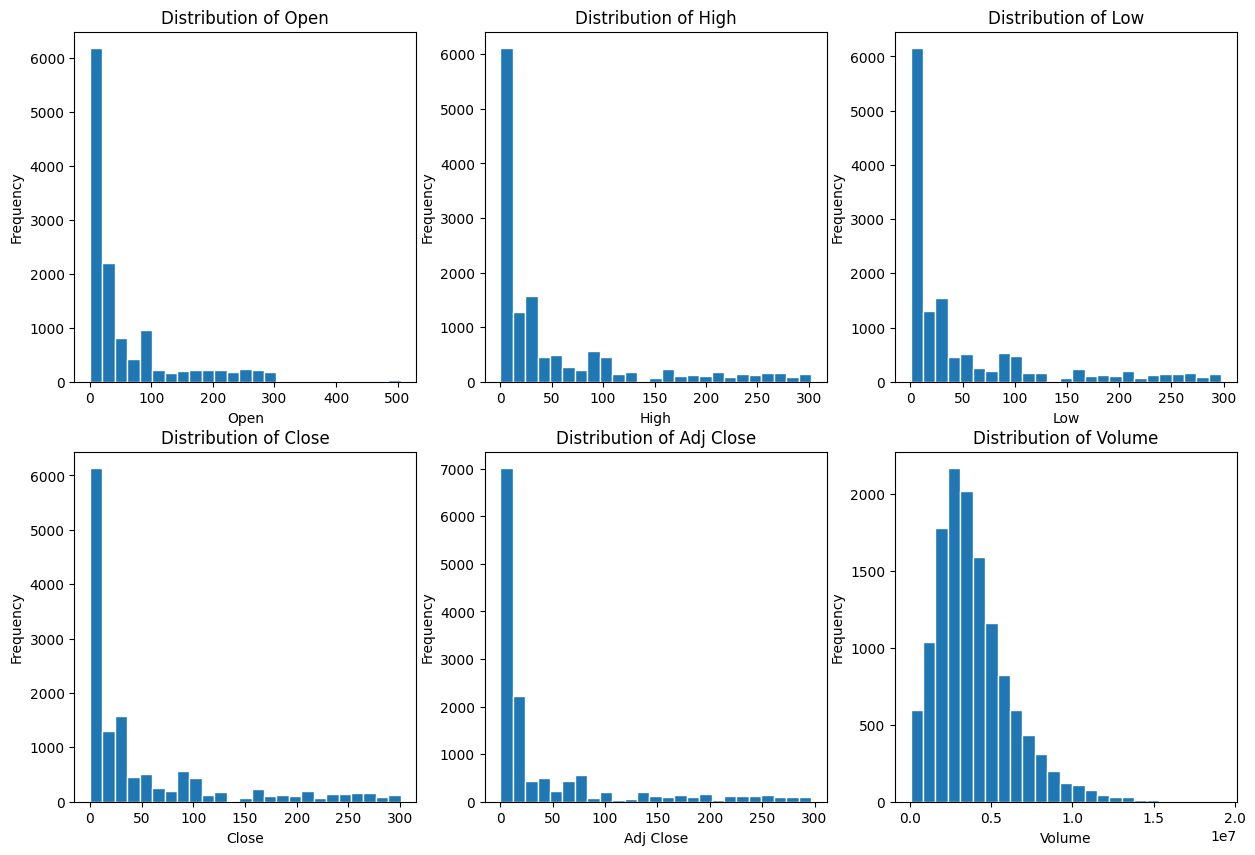

In [20]:
rows = len(visu_columns)//3  # Determine the number of rows of subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust the figure size based on rows
axes = axes.flatten()  # Flatten axes for iteration

for i, col in enumerate(visu_columns):  # Iterate through the relevant columns
    axes[i].hist(df[col], bins=25, edgecolor='white')  # Plot the distribution
    axes[i].set_title(f'Distribution of {col}')  # Set graph title
    axes[i].set_xlabel(col)  # Set graph x axis label
    axes[i].set_ylabel('Frequency')  # Set graph y axis label

plt.show()  # Display graph

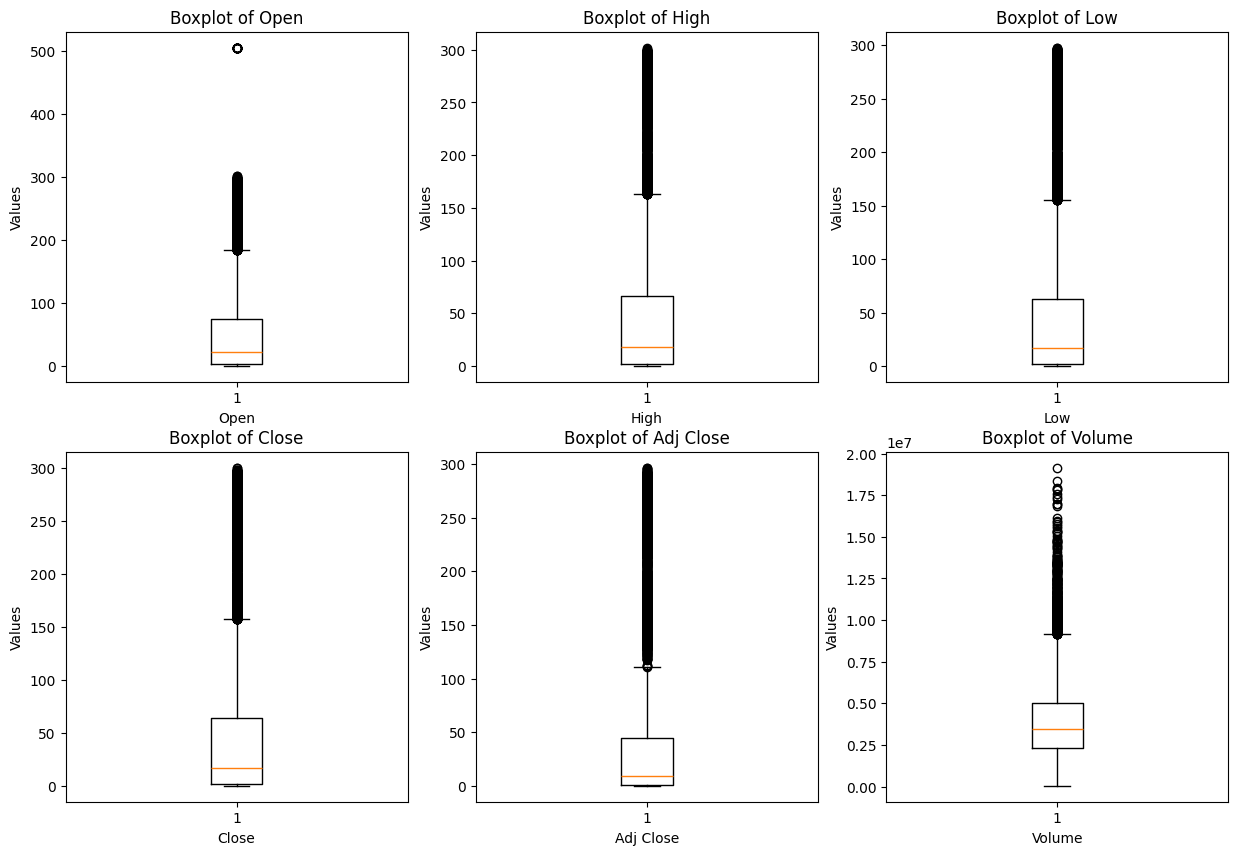

In [21]:
rows = len(visu_columns)//3  # Determine the number of rows of subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Adjust the figure size based on rows
axes = axes.flatten()  # Flatten axes for iteration

for i, col in enumerate(visu_columns):  # Iterate through the relevant columns
    axes[i].boxplot(df[col].dropna(), vert=True)  # Plot the boxplots
    axes[i].set_title(f'Boxplot of {col}')  # Set graph title
    axes[i].set_xlabel(col)  # Set graph x axis label
    axes[i].set_ylabel('Values')  # Set graph y axis label

plt.show()  # Display graph

In the column 'Open' there seem to still be a few significant outliers remaining. As these are all above 500, we will manually set them to N/A.

In [22]:
df.loc[df['Open'] > 500, 'Open'] = pd.NA  # Set all values in the column 'Open' above 500 to N/A

no_open_above_500 = (df['Open'] >= 500).sum()  # Count how many Open values above 500 are remaining

print(f'There are {no_open_above_500} Open values above 500 remaining.')

There are 0 Open values above 500 remaining.


Now we have successfully removed all significant outliers.

### Step 5: Impute missing values

Now that we have replaced the outliers with N/A, we need to impute all the N/A's with other values.

In [23]:
impu_columns = ['High', 'Low', 'Adj Close', 'Volume']  # Define the relevant columns for imputing

We have first determined the relevant columns we want to interpolate.

In [24]:
for col in impu_columns:  # Iterate through all relevant columns (excluding 'Open' and 'Close' because they're treated differently later)
    df[col] = df[col].interpolate(method='linear')  # Interpolate missing values

df.isna().sum()  # Check results

Date            0
Open         2006
High            0
Low             0
Close        1193
Adj Close       0
Volume          0
YearMonth       0
dtype: int64

We chose to take the mean of the last value and next non-missing value as imputation, as it makes sense in the context of share prices. However, we have left out the 'Close' value because we want to impute this using the mean of 'Low' and 'High'. We also left out 'Open' because we want to impute it by setting it as the last 'Close' value.

In [25]:
df['Close'] = df['Close'].fillna((df['High'] + df['Low']) / 2)  # Set missing 'Close' values as the mean of 'Low' and 'High' values

df['Open'] = df['Open'].fillna(df['Close'].shift(1))  # Set missing 'Open' values as the last 'Close' value

df.isna().sum()  # Check results

Date         0
Open         1
High         0
Low          0
Close        0
Adj Close    0
Volume       0
YearMonth    0
dtype: int64

After replacing all 'Open' and 'Close' values, there is still one N/A remaining for 'Open'.

In [26]:
df.head(10)  # Inspect beginning of dataset

,Date,Open,High,Low,Close,Adj Close,Volume,YearMonth
0,1966-07-05,<NA>,0.273663,0.26749,0.269547,0.115991,388800.0,1966-07
1,1966-07-06,0.269547,0.283951,0.26749,0.283951,0.12219,692550.0,1966-07
2,1966-07-07,0.283951,0.291152,0.271605,0.273663,0.117762,680400.0,1966-07
3,1966-07-08,0.273663,0.276749,0.26749,0.276749,0.11909,668250.0,1966-07
4,1966-07-11,0.276749,0.283951,0.269033,0.276492,0.118648,656100.0,1966-07
5,1966-07-12,0.276492,0.273663,0.270576,0.271605,0.116877,303750.0,1966-07
6,1966-07-13,0.271605,0.274691,0.269547,0.270576,0.116434,315900.0,1966-07
7,1966-07-14,0.270576,0.271605,0.26749,0.26749,0.115106,328050.0,1966-07
8,1966-07-15,0.26749,0.268519,0.263374,0.263374,0.113335,376650.0,1966-07
9,1966-07-18,0.263374,0.271605,0.261317,0.263374,0.112449,607500.0,1966-07


We can see that this instance is in the beginning of the respective column and was therefore not imputed by the interpolation method. We have decided to set the starting value to the low value of the same period, as this makes sense in the context of share prices.

In [27]:
df.loc[0, 'Open'] = df.loc[0, 'Low']  # Replacing the first 'Open' price with the first 'Low' price

df.isna().sum()  # Check results

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
YearMonth    0
dtype: int64

Now we can see that there are no missing values remaining. We will plot the stock developments to do one last check.

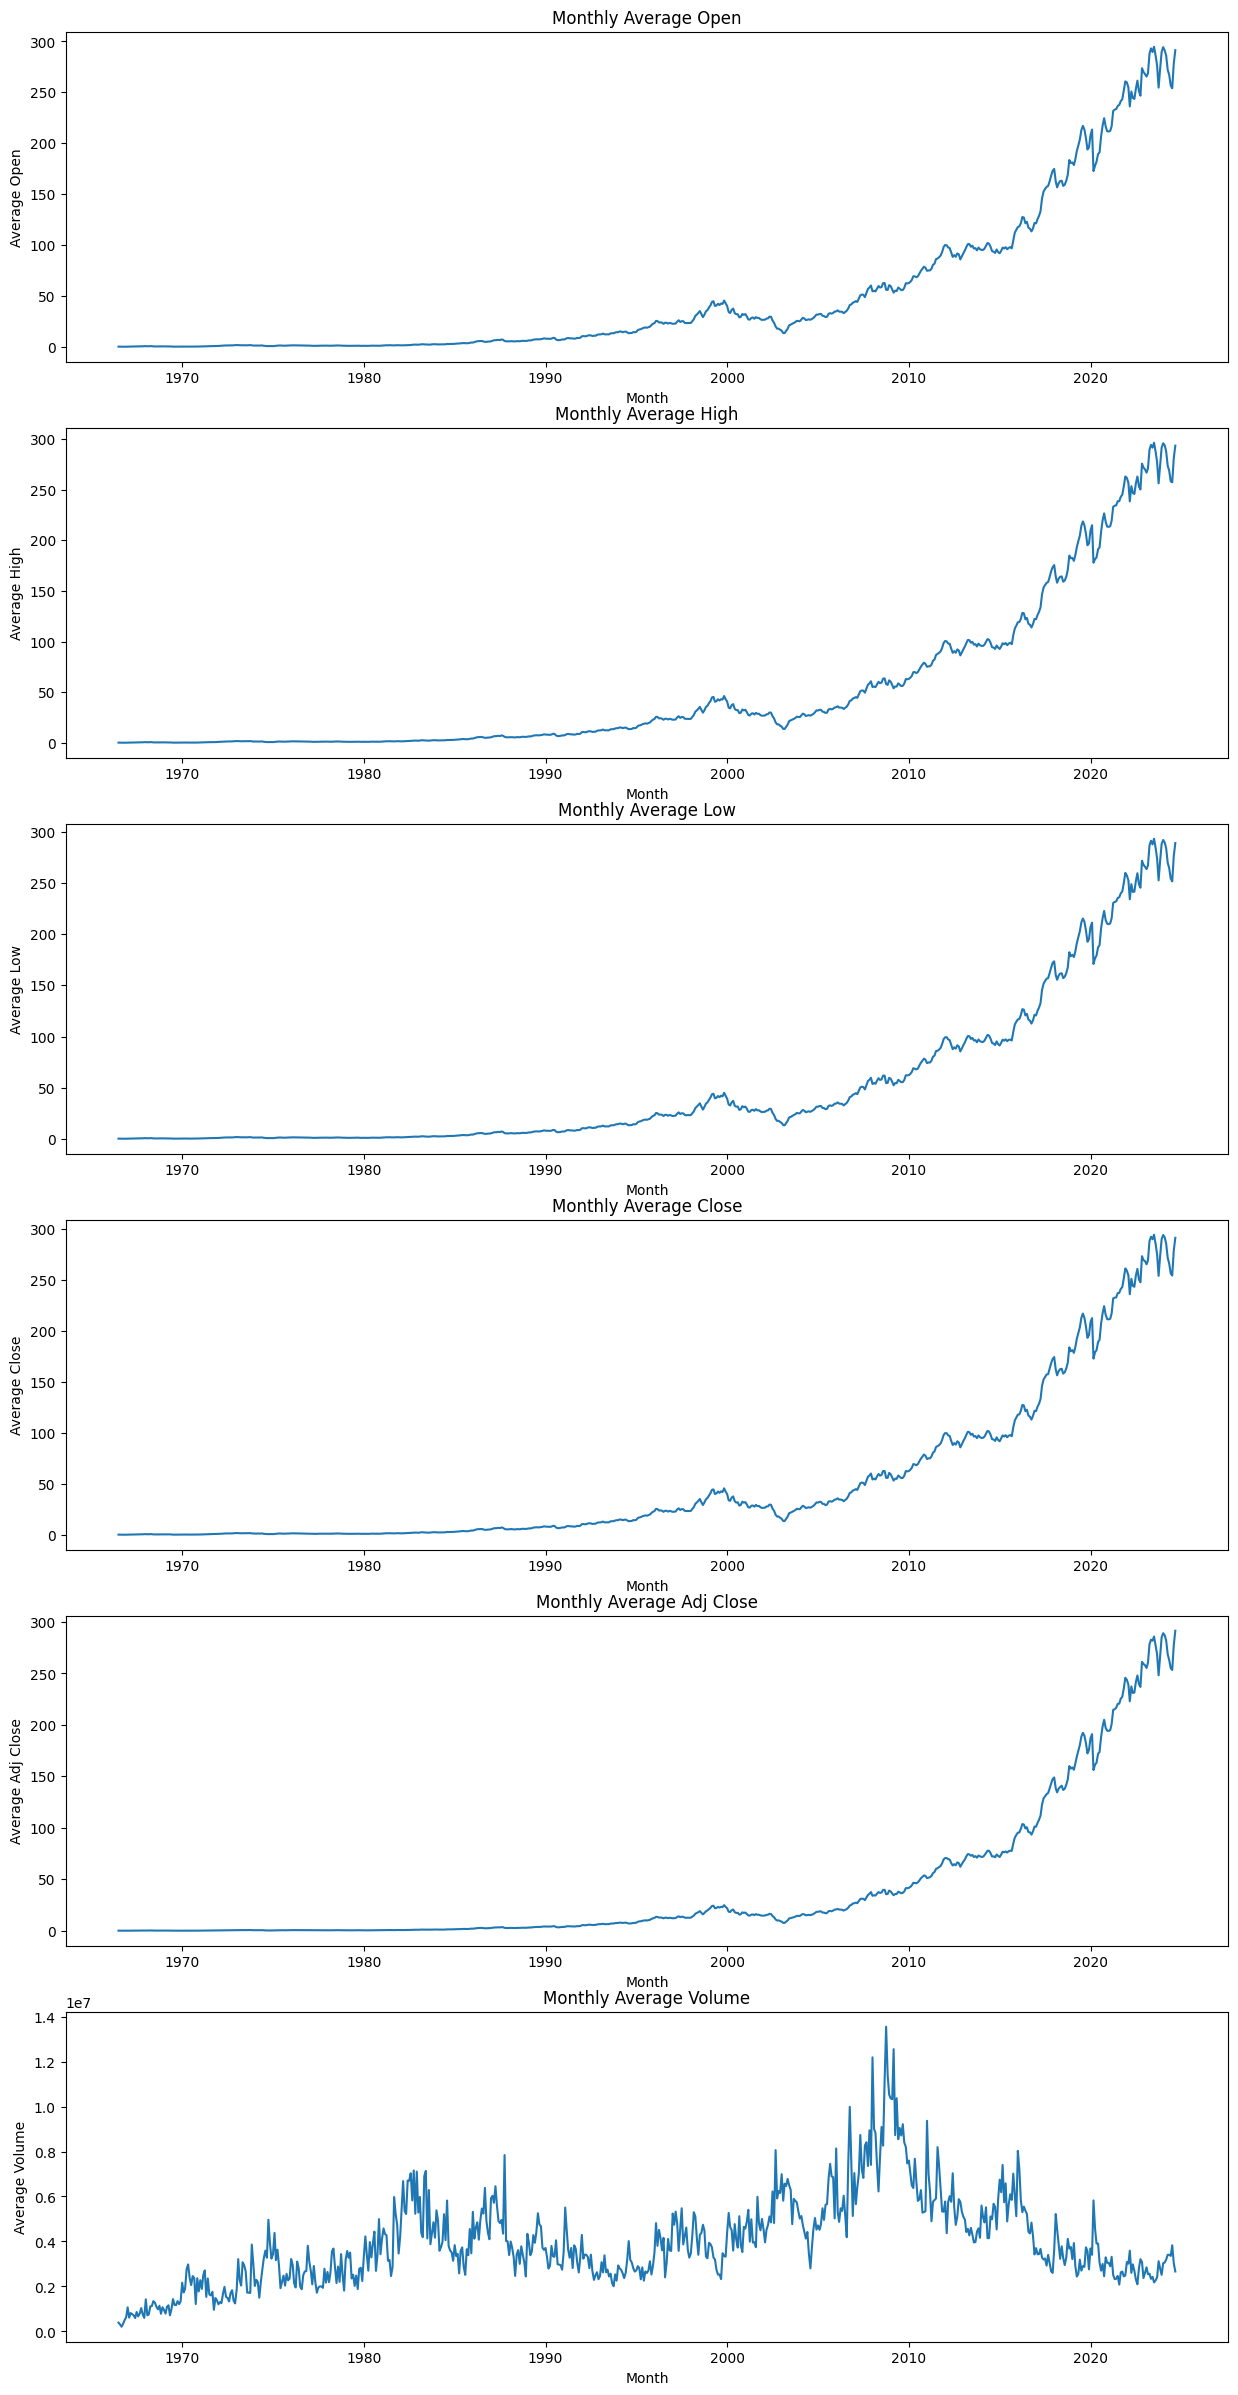

In [28]:
rows = len(visu_columns)  # Determine the number of rows of subplots
fig, axes = plt.subplots(rows, 1, figsize=(15, 5 * rows))  # Adjust figure size based on rows
axes = axes.flatten()  # Flatten axes for iteration

for i, col in enumerate(visu_columns):  # Iterate through the relevant columns
    monthly_price = df.groupby('YearMonth')[col].mean()  # Group the price by months and calculate the mean
    monthly_price.index = monthly_price.index.to_timestamp()  # Convert the period to timestamp
    axes[i].plot(monthly_price)  # Plot the monthly prices
    axes[i].set_title(f'Monthly Average {col}')  # Set graph title
    axes[i].set_xlabel('Month')  # Set graph x axis label
    axes[i].set_ylabel(f'Average {col}')  # Set graph y axis label

plt.show()  # Display graph

df = df.drop(columns=['YearMonth'])  # Remove the column created for this graph after the last plot

The developments look reasonable in their respective context and don't seem to include outliers. Therefore we successfully conclude the data cleaning.

---

## Export Cleaned Dataframe

Lastly we will export the cleaned dataframe as a new csv to work with later.

In [29]:
df.to_csv('../Cleaned Dataset/MCD_cleaned.csv', index=False)